In [1]:
import sys
import os
# Include the project root directory in the import path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from core import find_peaks_volumetric_persistence
from utils import plot_volumetric_persistence_barcode, plot_spectrum_with_detected_peaks

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel("../Data/Dati_luglio.xlsx", sheet_name='Cobalto I') # all sheet names are 'Cobalto I', 'Sodio I' and 'Cesio I'
df.head()

,CH0,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,...,CH54.1,CH55.1,CH56.1,CH57.1,CH58.1,CH59.1,CH60.1,CH61.1,CH62.1,CH63.1
0,371,432,365,376,391,340,362,507,430,442,...,373,383,328,328,293,311,261,262,265,282
1,12,16,17,13,20,19,13,22,11,16,...,23,15,18,14,5,8,9,16,14,7
2,17,21,15,16,14,15,15,15,18,18,...,13,21,16,7,12,19,8,11,13,7
3,21,12,8,22,18,9,18,17,21,11,...,22,23,20,12,14,14,6,11,9,12
4,24,13,15,22,14,17,23,16,14,21,...,17,20,18,16,13,14,12,17,11,15


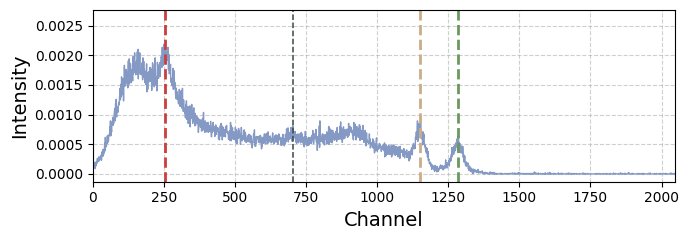

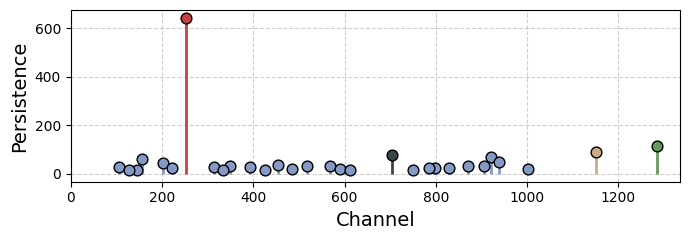

In [3]:
# take a sample column as an example
spectrum = df.iloc[:, 23]  # assuming the second column is the spectrum data
# turn to numpy array if needed
if isinstance(spectrum, pd.Series):
    spectrum = spectrum.to_numpy()

# normalize the spectrum by area under the curve
spectrum = spectrum / np.trapezoid(spectrum)

# Define ranges for all parameters.
smoothing_range = [1, 3, 5]           # Moving average window sizes.
bins_factor_range = [1, 2]            # Aggregation factors.
threshold_range = np.linspace(0, 0.004, 7)
width_range = np.linspace(1, 50, 7)
prominence_range = np.linspace(0.0001, 0.005, 7)
distance_range = np.array([1, 5, 10, 15, 20])

# Run the grid-based peak finder.
peaks_info = find_peaks_volumetric_persistence(spectrum,
                                                smoothing_range,
                                                bins_factor_range,
                                                threshold_range,
                                                width_range,
                                                prominence_range,
                                                distance_range,
                                                merging_range=10,
                                                tol=1,
                                                parallel=True,
                                                top_k=30)
    
COLORS = {
    "spectrum":      "#8499C4",
    "detected_peak": ["#C94040", "#69995D", "#CBAC88", "#394648"],
    "alphas":    [1.0, 1.0, 1.0, 1.0],
    "linewidths": [2.0, 2.0, 2.0, 1.1],
}
FONTSIZE = {
    "label":  14,
    "title":  16,
    "legend": 12,
}

x = np.arange(len(spectrum))  # Assuming x is the index of the spectrum data
plot_spectrum_with_detected_peaks(
    x, spectrum, peaks_info,
    top_k=4,
    detected_style='vertical_line',
    COLORS=COLORS,
    FONTSIZE=FONTSIZE
)


# Generate the barcode persistence plot.
plot_volumetric_persistence_barcode(peaks_info)
